Start

In [23]:
# imports
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

In [24]:
PP_PATH = config['Paths']['processed_data']
df_pp = pd.read_csv(f'{PP_PATH}heart_encoded_2.csv', delimiter=",")
print(df_pp.info())

df_pp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              918 non-null    int64  
 1   Sex              918 non-null    int64  
 2   ChestPainType    918 non-null    int64  
 3   RestingBP        918 non-null    int64  
 4   Cholesterol      918 non-null    int64  
 5   FastingBS        918 non-null    int64  
 6   RestingECG       918 non-null    int64  
 7   MaxHR            918 non-null    int64  
 8   ExerciseAngina   918 non-null    int64  
 9   Oldpeak          918 non-null    float64
 10  ST_Slope         918 non-null    int64  
 11  HeartDisease     918 non-null    int64  
 12  Cholesterol_imp  918 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 93.4 KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_imp
0,40,1,1,140,289,0,1,172,0,0.0,2,0,289
1,49,0,2,160,180,0,1,156,0,1.0,1,1,180
2,37,1,1,130,283,0,2,98,0,0.0,2,0,283
3,48,0,0,138,214,0,1,108,1,1.5,1,1,214
4,54,1,2,150,195,0,1,122,0,0.0,2,0,195


In [25]:
df_pp.HeartDisease.value_counts(dropna=False)

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [50]:
columns_to_drop = ['HeartDisease', 'Cholesterol_imp', 'RestingECG'] # RestingBP

features = df_pp[df_pp.columns.drop(columns_to_drop)].values
target = df_pp['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) # 80/20 split

In [63]:
# helper function
def model(classifier, x_train, x_test, y_train, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    print(f'Accuracy: {round(accuracy_score(y_test,prediction), 3)}')
    print(f'Cross Validation Score: {round(cross_val_score(classifier, x_train, y_train, cv=cv, scoring="roc_auc").mean(), 3)}')
    print(f'ROC_AUC Score: {round(roc_auc_score(y_test, prediction), 3)}')

def model_evaluate(classifier, x_test, y_test):
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    sns.heatmap(cm, annot = True)
    
    print(classification_report(y_test, classifier.predict(x_test)))

In [64]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=42, C=10, max_iter=1000) 
model(classifier_lr, x_train, x_test, y_train, y_test)

Accuracy: 0.842
Cross Validation Score: 0.912
ROC_AUC Score: 0.848


              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



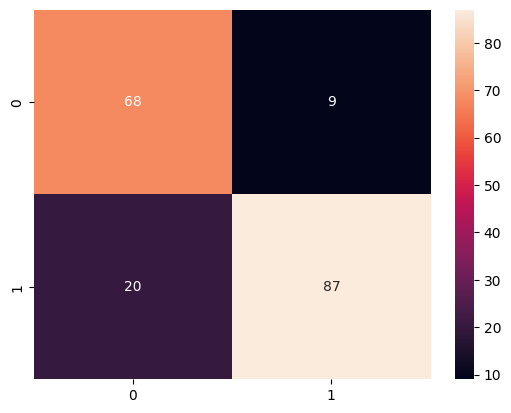

In [65]:
model_evaluate(classifier_lr, x_test, y_test)

In [66]:
# SVM
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear')
model(classifier_svc, x_train, x_test, y_train, y_test)

Accuracy: 0.837
Cross Validation Score: 0.912
ROC_AUC Score: 0.842


              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



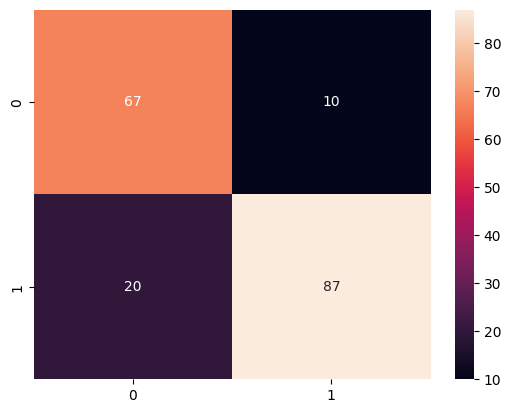

In [67]:
model_evaluate(classifier_svc, x_test, y_test)

In [69]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 42, max_depth = 4, min_samples_leaf = 1)
model(classifier_dt, x_train, x_test, y_train, y_test)

Accuracy: 0.87
Cross Validation Score: 0.887
ROC_AUC Score: 0.868


              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



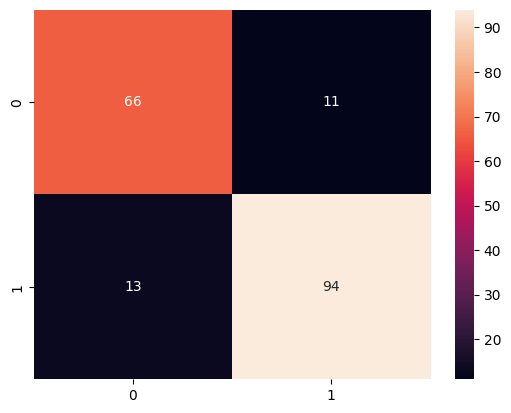

In [70]:
model_evaluate(classifier_dt, x_test, y_test)

In [71]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4, random_state = 42)
model(classifier_rf, x_train, x_test, y_train, y_test)

Accuracy: 0.87
Cross Validation Score: 0.925
ROC_AUC Score: 0.871


              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



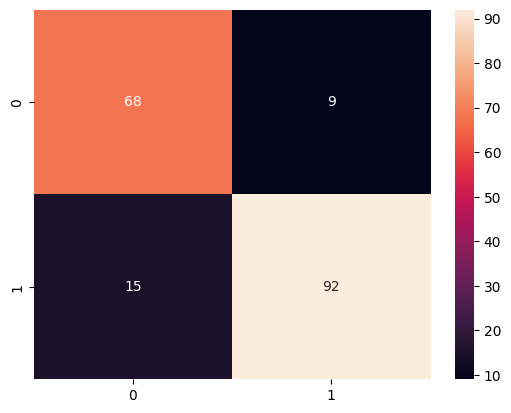

In [72]:
model_evaluate(classifier_rf, x_test, y_test)

In [73]:
# knearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
model(classifier_knn, x_train, x_test, y_train, y_test)

Accuracy: 0.701
Cross Validation Score: 0.755
ROC_AUC Score: 0.694


              precision    recall  f1-score   support

           0       0.64      0.65      0.65        77
           1       0.75      0.74      0.74       107

    accuracy                           0.70       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.70      0.70       184



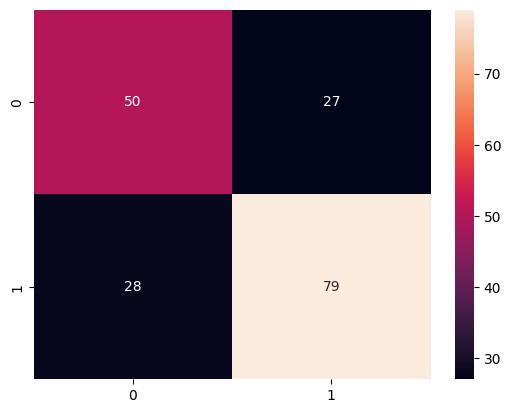

In [74]:
model_evaluate(classifier_knn, x_test, y_test)

... 